<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


Import all you can

In [14]:
import sqlite3
import urllib.request
import pandas as pd


In [15]:
# Specify the URL of the remote database file
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'

# Specify the local file path where the database file will be saved
file_path = 'm4_survey_data.sqlite'

# Download the remote database file and save it locally
urllib.request.urlretrieve(url, file_path)

# Connect to the local database file
conn = sqlite3.connect(file_path)

# Verify if the connection was successful
if conn:
    print("Connected to the database!")
else:
    print("Failed to connect to the database!")

Connected to the database!


## Demo: How to run an sql query


In [16]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [17]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [18]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [19]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [20]:
# your code goes here
# Do I need to know which table this blasted column is? 
QUERY = """
SELECT name
FROM sqlite_master
WHERE type='table' AND sql LIKE '%ConvertedComp%'
"""
pd.read_sql_query(QUERY,conn)

,name
0,master


In [21]:
query = "SELECT ConvertedComp FROM master"
df_ConvertedComp = pd.read_sql_query(query, conn)
df_ConvertedComp.head()

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0


In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

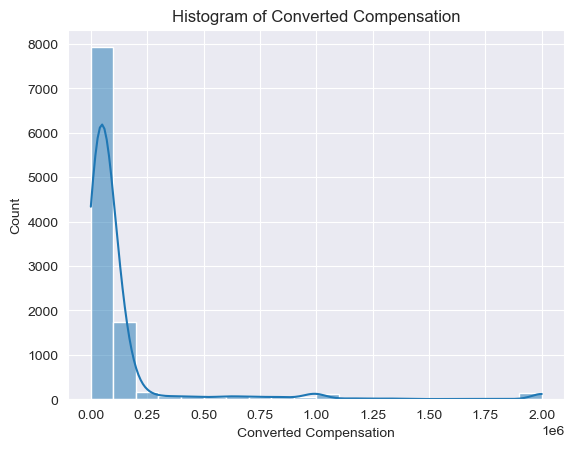

In [41]:
# Set the style to 'darkgrid'
sns.set_style('darkgrid')

# Create the histogram using sns.histplot
sns.histplot(df_ConvertedComp['ConvertedComp'], kde=True, bins=20)

# Set labels and title
plt.xlabel('Converted Compensation')
plt.ylabel('Count')
plt.title('Histogram of Converted Compensation')

# Show the histogram
plt.show()

### Box Plots


Plot a box plot of `Age.`


In [42]:
# your code goes here
# Do I need to know which table this blasted column is? 
QUERY = """
SELECT name
FROM sqlite_master
WHERE type='table' AND sql LIKE '%Age%'
"""
pd.read_sql_query(QUERY,conn)


,name
0,LanguageWorkedWith
1,LanguageDesireNextYear
2,master


In [43]:
# Execute the SQL query to fetch the 'Age' column from the 'master' table
query = "SELECT Age FROM master"
df_Age = pd.read_sql_query(query, conn)

# Display the first few rows of the DataFrame
df_Age.head()

,Age
0,22.0
1,23.0
2,28.0
3,26.0
4,29.0


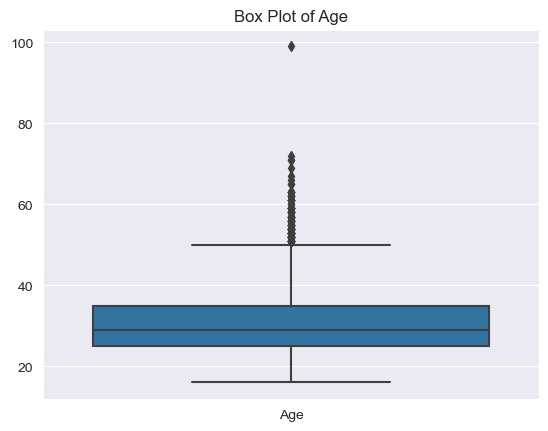

In [45]:
# Create a box plot of the 'Age' column
sns.boxplot(data=df_Age)

# Set the title and labels
plt.title('Box Plot of Age')

# Display the plot
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [46]:
# your code goes here
# Execute the SQL query to fetch the 'Age' and 'WorkWeekHrs' column from the 'master' table
query = "SELECT Age, WorkWeekHrs FROM master"
df_Age_WorkWeekHrs = pd.read_sql_query(query, conn)

# Display the first few rows of the DataFrame
df_Age_WorkWeekHrs.head()


,Age,WorkWeekHrs
0,22.0,80.0
1,23.0,32.0
2,28.0,40.0
3,26.0,40.0
4,29.0,45.0


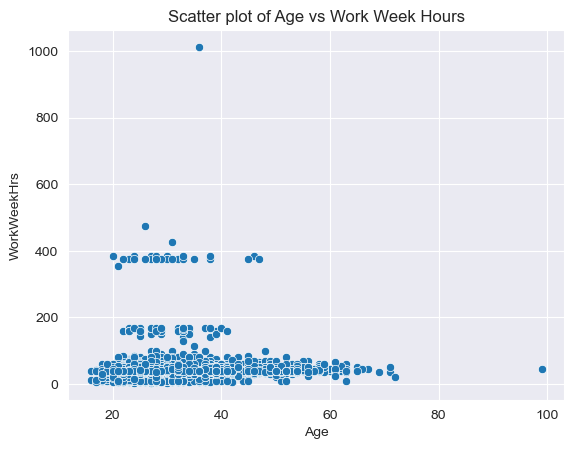

In [47]:
sns.scatterplot(data=df_Age_WorkWeekHrs, x='Age', y='WorkWeekHrs')
# Set the title and labels
plt.title('Scatter plot of Age vs Work Week Hours')

# Display the plot
plt.show()

In [48]:
df_Age_WorkWeekHrs['WorkWeekHrs'].describe()

count    11276.000000
mean        42.064606
std         24.672741
min          3.000000
25%         40.000000
50%         40.000000
75%         43.000000
max       1012.000000
Name: WorkWeekHrs, dtype: float64

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [49]:
# your code goes here
# Execute the SQL query to fetch the 'Age', 'WorkWeekHrs' and 'CodeRevHrs' column from the 'master' table
query = "SELECT Age, WorkWeekHrs, CodeRevHrs FROM master"
df_Age_WorkWeekHrs_CodeRevHrs = pd.read_sql_query(query, conn)

# Display the first few rows of the DataFrame
df_Age_WorkWeekHrs_CodeRevHrs.head()

,Age,WorkWeekHrs,CodeRevHrs
0,22.0,80.0,NaN
1,23.0,32.0,12.0
2,28.0,40.0,5.0
3,26.0,40.0,NaN
4,29.0,45.0,5.0


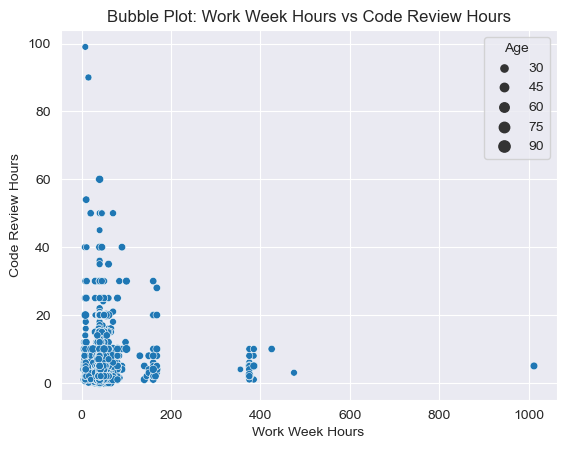

In [50]:
# Create the bubble plot
sns.scatterplot(data=df_Age_WorkWeekHrs_CodeRevHrs, x='WorkWeekHrs', y='CodeRevHrs', size='Age')

# Set labels and title
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')
plt.title('Bubble Plot: Work Week Hours vs Code Review Hours')

# Display the plot
plt.show()

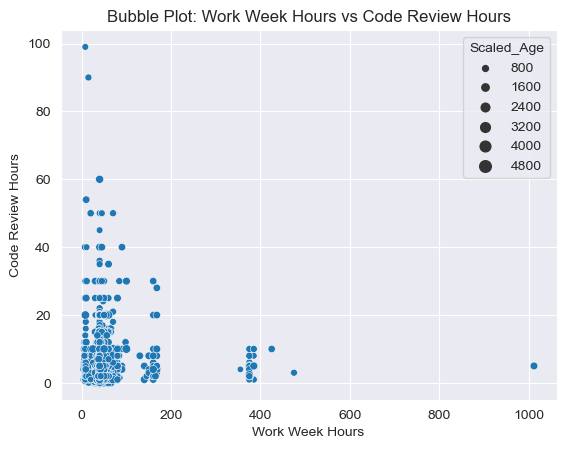

In [52]:
#2nd try
# Define the scaling factor for bubble sizes
scaling_factor = 50

# Scale the 'Age' values
df_Age_WorkWeekHrs_CodeRevHrs['Scaled_Age'] = df_Age_WorkWeekHrs_CodeRevHrs['Age'] * scaling_factor

# Create the bubble plot
sns.scatterplot(data=df_Age_WorkWeekHrs_CodeRevHrs, x='WorkWeekHrs', y='CodeRevHrs', size='Scaled_Age')

# Set labels and title
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')
plt.title('Bubble Plot: Work Week Hours vs Code Review Hours')

# Display the plot
plt.show()


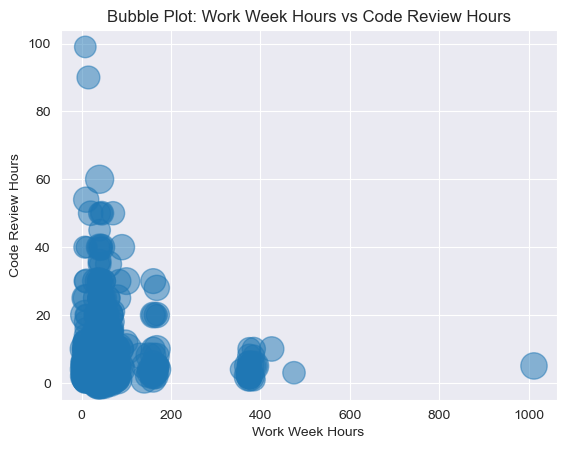

In [71]:
# apparently it's shit and as one suggestion in discussions go scatter from matplotlib is a better option

# Extract the required columns
x = df_Age_WorkWeekHrs_CodeRevHrs['WorkWeekHrs']
y = df_Age_WorkWeekHrs_CodeRevHrs['CodeRevHrs']
age = df_Age_WorkWeekHrs_CodeRevHrs['Age']

# Define the scaling factor for bubble sizes
scaling_factor = 10

# Scale the 'Age' values
sizes = age * scaling_factor

# Create the bubble plot
plt.scatter(x, y, s=sizes, alpha=0.5)

# Set labels and title
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')
plt.title('Bubble Plot: Work Week Hours vs Code Review Hours')

# Display the plot
plt.show()

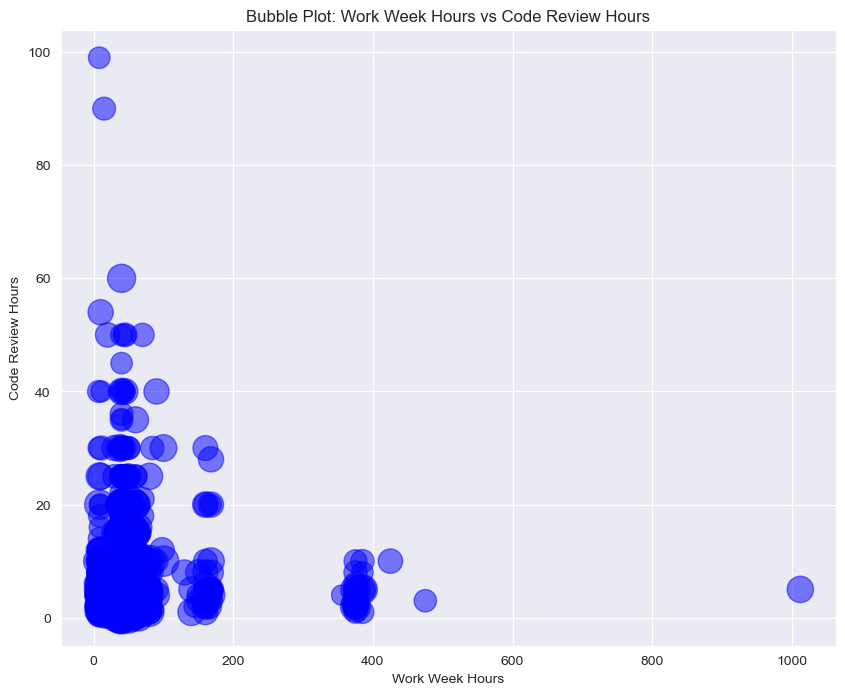

In [58]:
#ok, previous was better but still a new try as in visualization with python course on boxplots and scatter plots example

# Scale the 'Age' values by 10
bubble_sizes = df_Age_WorkWeekHrs_CodeRevHrs['Age'] * 10

# Create a scatter plot with scaled bubble sizes
ax = df_Age_WorkWeekHrs_CodeRevHrs.plot(kind='scatter',
                                        x='WorkWeekHrs',
                                        y='CodeRevHrs',
                                        alpha=0.5,
                                        s=bubble_sizes,
                                        color='blue',
                                        figsize=(10, 8))

# Set labels and title
ax.set_xlabel('Work Week Hours')
ax.set_ylabel('Code Review Hours')
ax.set_title('Bubble Plot: Work Week Hours vs Code Review Hours')

# Display the plot
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [74]:
# your code goes here
# I this even correct approach...? to keep creating dataframes... but I, of course, cannot come up with anything much better
QUERY = """
SELECT name
FROM sqlite_master
WHERE type='table' AND sql LIKE '%DatabaseDesireNextYear%'
"""
pd.read_sql_query(QUERY,conn)



,name
0,DatabaseDesireNextYear


In [75]:
table_name = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "DatabaseDesireNextYear" (
"Respondent" INTEGER,
  "DatabaseDesireNextYear" TEXT
)


In [76]:
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) AS Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""
df_DatabaseDesireNextYear = pd.read_sql_query(QUERY,conn)


In [77]:
df_DatabaseDesireNextYear


,DatabaseDesireNextYear,Count
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


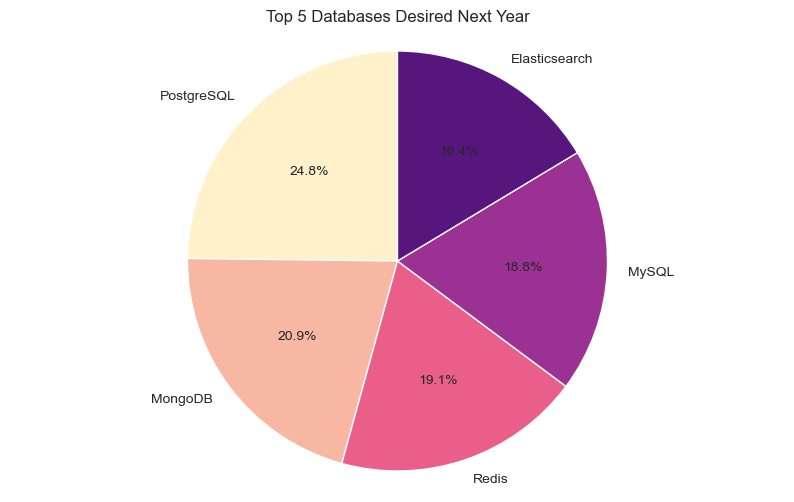

In [89]:
#FINALLY a PIE chart!
colors_list = ['#FFF1C9', '#F7B7A3', '#EA5F89', '#9B3192', '#57167E']

# Create the pie chart
df_DatabaseDesireNextYear['Count'].plot(kind='pie',
                                        figsize=(10, 6),
                                        autopct='%1.1f%%',
                                        startangle=90,
                                        shadow=False,
                                        labels=df_DatabaseDesireNextYear['DatabaseDesireNextYear'],
                                        colors=colors_list
                                        )

# Set the title
plt.title('Top 5 Databases Desired Next Year')

plt.axis('equal')
# Remove the y-axis label
plt.ylabel('')

# Display the chart
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [91]:
# your code goes here
query = """
SELECT
    CASE
        WHEN Age = 30 THEN '30'
        WHEN Age = 31 THEN '31'
        WHEN Age = 32 THEN '32'
        WHEN Age = 33 THEN '33'
        WHEN Age = 34 THEN '34'
        WHEN Age = 35 THEN '35'
    END AS AgeGroup,
    AVG(WorkWeekHrs) AS MedianWorkWeekHrs,
    AVG(CodeRevHrs) AS MedianCodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
GROUP BY AgeGroup
"""

df_age_group_median = pd.read_sql_query(query, conn)

# Display the result
df_age_group_median


,AgeGroup,MedianWorkWeekHrs,MedianCodeRevHrs
0,30,43.131579,4.696858
1,31,41.602746,4.701923
2,32,42.650207,5.008557
3,33,44.486952,4.724311
4,34,43.147583,4.869902
5,35,42.451550,4.745130


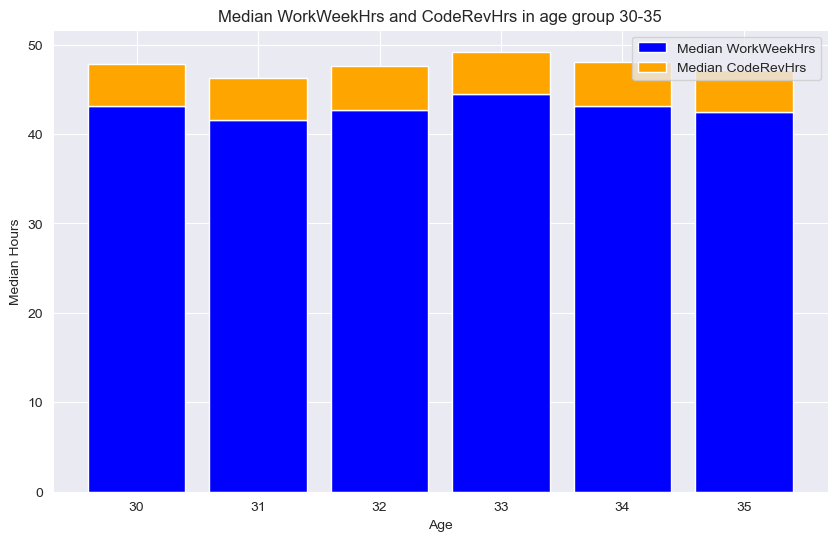

In [93]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Get the age groups
age_groups = df_age_group_median['AgeGroup']

# Get the median work week hours and code review hours
median_workweekhrs = df_age_group_median['MedianWorkWeekHrs']
median_coderevhrs = df_age_group_median['MedianCodeRevHrs']

# Set the positions of the bars on the x-axis
bar_positions = range(len(age_groups))

# Create the stacked bar chart
plt.bar(bar_positions, median_workweekhrs, label='Median WorkWeekHrs', color='blue')
plt.bar(bar_positions, median_coderevhrs, label='Median CodeRevHrs', color='orange', bottom=median_workweekhrs)

# Set the x-axis ticks and labels
plt.xticks(bar_positions, age_groups)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Median Hours')
plt.title('Median WorkWeekHrs and CodeRevHrs in age group 30-35')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [94]:
# your code goes here
query = "SELECT Age, ConvertedComp FROM master WHERE Age BETWEEN 45 AND 60"
df_age_comp = pd.read_sql_query(query, conn)
df_age_comp.head()

,Age,ConvertedComp
0,47.0,103000.0
1,54.0,NaN
2,47.0,54996.0
3,47.0,62807.0
4,45.0,72522.0


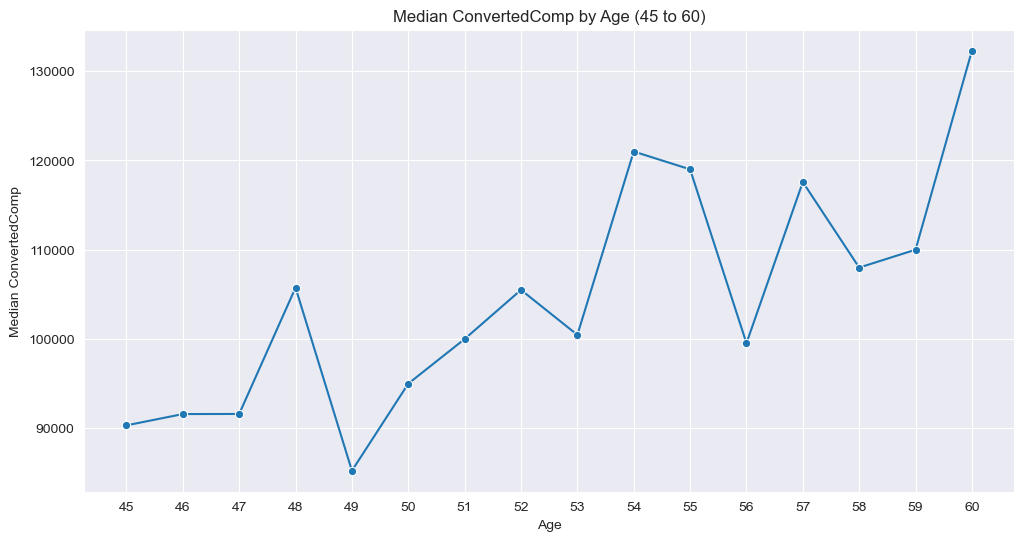

In [97]:
# Calculate the median ConvertedComp for each age group
median_comp_by_age = df_age_comp.groupby('Age')['ConvertedComp'].median()

# Create a line plot of the median ConvertedComp
plt.figure(figsize=(12, 6))
sns.lineplot(x=median_comp_by_age.index, y=median_comp_by_age.values, marker='o')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.title('Median ConvertedComp by Age (45 to 60)')

# Format x-axis labels
plt.xticks(ticks=median_comp_by_age.index, labels=[f'{int(age)}' for age in median_comp_by_age.index])
# The f'{int(age)}' formatting ensures that the labels display only the integer part of each age value.

# Display the plot
plt.show()

In [132]:
# your code goes here
query = "SELECT Age, ConvertedComp FROM master WHERE Age BETWEEN 25 AND 30"
df_age_comp_25_30 = pd.read_sql_query(query, conn)
df_age_comp_25_30.head()

,Age,ConvertedComp
0,28.0,90000.0
1,26.0,455352.0
2,29.0,65277.0
3,27.0,20623.0
4,27.0,107000.0


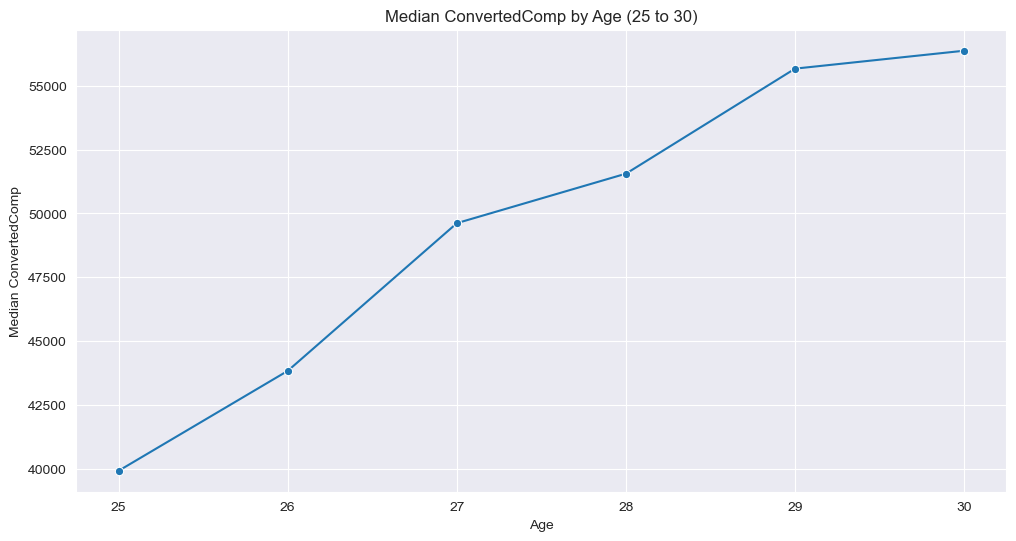

In [133]:
# Calculate the median ConvertedComp for each age group
median_comp_by_age = df_age_comp_25_30.groupby('Age')['ConvertedComp'].median()

# Create a line plot of the median ConvertedComp
plt.figure(figsize=(12, 6))
sns.lineplot(x=median_comp_by_age.index, y=median_comp_by_age.values, marker='o')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.title('Median ConvertedComp by Age (25 to 30)')

# Format x-axis labels
plt.xticks(ticks=median_comp_by_age.index, labels=[f'{int(age)}' for age in median_comp_by_age.index])
# The f'{int(age)}' formatting ensures that the labels display only the integer part of each age value.

# Display the plot
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`

In [99]:
# your code goes here
QUERY = """
SELECT name
FROM sqlite_master
WHERE type='table' AND sql LIKE '%MainBranch%'
"""
pd.read_sql_query(QUERY,conn)


,name
0,master


In [100]:
query = "SELECT MainBranch, COUNT(*) AS Count FROM master GROUP BY MainBranch"
df_mainbranch_count = pd.read_sql_query(query, conn)

# Display the resulting DataFrame
df_mainbranch_count.head()

,MainBranch,Count
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


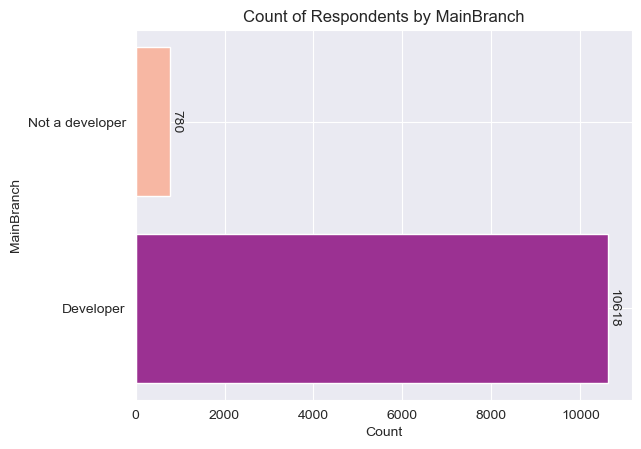

In [110]:
# Define a list of custom colors
custom_colors = ['#9B3192', '#F7B7A3']

# Create a horizontal bar chart
plt.barh(df_mainbranch_count['MainBranch'], df_mainbranch_count['Count'], color=custom_colors)

# Set labels and title
plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.title('Count of Respondents by MainBranch')

# Add count annotations at the end of each bar
for i, count in enumerate(df_mainbranch_count['Count']):
    plt.text(count, i, str(count), ha='left', va='center', rotation=270)

# Customize the y labels
custom_labels = ['Developer', 'Not a developer']  # Custom labels here
plt.yticks(range(len(df_mainbranch_count)), custom_labels)

# Display the plot
plt.show()

In [111]:
QUERY = """
SELECT name
FROM sqlite_master
WHERE type='table' AND sql LIKE '%LanguageDesireNextYear%'
"""
pd.read_sql_query(QUERY,conn)

,name
0,LanguageDesireNextYear


In [114]:
query = "SELECT LanguageDesireNextYear, COUNT(*) AS Count FROM LanguageDesireNextYear GROUP BY LanguageDesireNextYear ORDER BY Count DESC"
pd.read_sql_query(query, conn)


,LanguageDesireNextYear,Count
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088
5,C#,3591
6,Bash/Shell/PowerShell,3097
7,Java,2953
8,Go,2759
9,Kotlin,1890


In [115]:
QUERY = """
SELECT name
FROM sqlite_master
WHERE type='table' AND sql LIKE '%LanguageWorkedWith%'
"""
pd.read_sql_query(QUERY,conn)


,name
0,LanguageWorkedWith


In [116]:
query = "SELECT COUNT(*) AS Count FROM LanguageWorkedWith WHERE LanguageWorkedWith = 'SQL'"
pd.read_sql_query(query, conn)

,Count
0,7106


In [128]:
QUERY = """
SELECT name
FROM sqlite_master
WHERE type='table' AND sql LIKE '%DatabaseWorkedWith%'
"""
pd.read_sql_query(QUERY,conn)

,name
0,DatabaseWorkedWith


In [131]:
query = "SELECT COUNT(*) AS Count FROM DatabaseWorkedWith WHERE DatabaseWorkedWith LIKE '%MySQL%'"
pd.read_sql_query(query, conn)



,Count
0,5469


Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
